In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=load_svmlight_file('housing_scale.txt')
x=data[0].todense()
y=data[1]

In [3]:
X_train,X_validation,y_train,y_validation=train_test_split(x,y,test_size=0.2,random_state=100)

In [4]:
X_train=X_train.T#x为列向量
x_0=np.ones(X_train.shape[1])#x0=1
X_train=np.row_stack((X_train,x_0))
y_train=np.mat(y_train)#y为行向量

X_validation=X_validation.T#x为列向量
x_0=np.ones(X_validation.shape[1])#x0=1
X_validation=np.row_stack((X_validation,x_0))
y_validation=np.mat(y_validation)#y为行向量

In [5]:
def compute_loss(w,x,y):
    totalError = 0
    y_pre=w.T*x
    for i in range(y.shape[1]):
        totalError+=((y[0,i]-y_pre[0,i])**2)/2.0
    return (totalError/float(x.shape[1]))

In [7]:
def compute_gradient(w_current,x,y,learning_rate):

    w_gradient = np.mat(np.zeros(x.shape[0])).T
    
    N = float(x.shape[1])
    X=x.T#每行对应一个样本
    
    w_gradient=2*(X.T*(X*w_current-y.T))
    new_w = w_current-(learning_rate * w_gradient)
    
    return new_w


In [22]:
learning_rate = 0.00001
initial_w = np.mat(np.zeros(X_train.shape[0])).T
    
num_iter = 5000
loss_train=[]
loss_validation=[]
loss_train.append(compute_loss(initial_w,X_train,y_train))
loss_validation.append(compute_loss(initial_w,X_validation,y_validation))
#train model
w=initial_w
for i in range(num_iter):
    w=compute_gradient(w,X_train,y_train,learning_rate)
    loss_train.append(compute_loss(w,X_train,y_train))
    loss_validation.append(compute_loss(w,X_validation,y_validation))

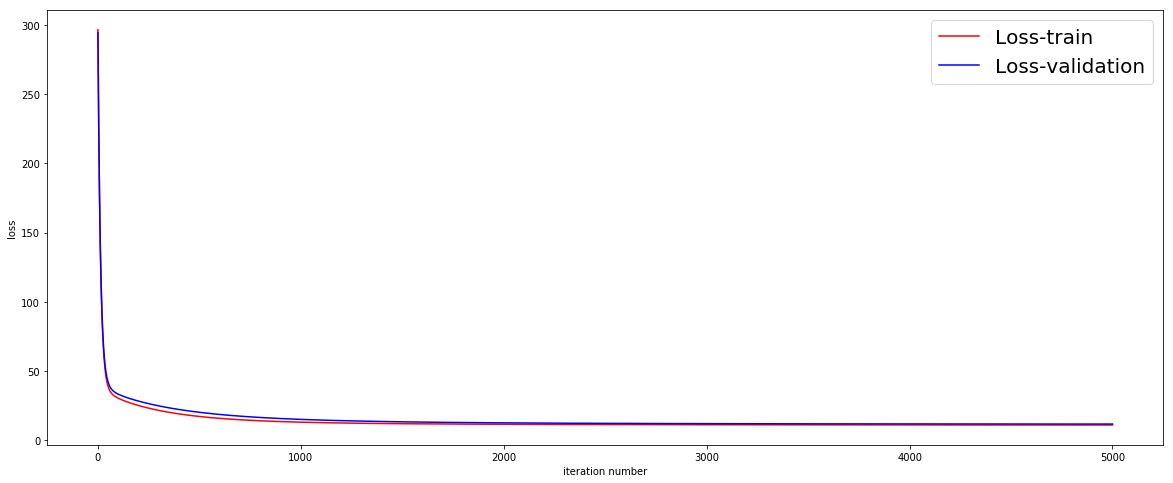

10.9888102744
11.6955694087


In [23]:
plt.figure(figsize=(20,8))
plt.plot(loss_train,color='red',label='Loss-train')
plt.plot(loss_validation,color='blue',label='Loss-validation')
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.legend(fontsize=20)
plt.show()
print(loss_train[-1])
print(loss_validation[-1])